# 1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 2. Chargement et Nettoyage des données

In [2]:
# Charger le dataset
df = pd.read_csv("kc_house_data_NaN.csv")

# Supprimer la colonne 'Unnamed: 0' et 'id' qui ne sont pas utiles
df.drop(columns=['Unnamed: 0', 'id', 'date'], inplace=True)


# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values[missing_values > 0])

# Remplacement des valeurs manquantes (si nécessaire)
df.fillna(df.median(), inplace=True)


Valeurs manquantes par colonne :
 bedrooms     13
bathrooms    10
dtype: int64


In [3]:
df.head()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372646,2.115798,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926423,0.768823,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

# 3. Analyse exploratoire et visualisation

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372646      2.115798   2079.899736  1.510697e+04   
std    3.671272e+05      0.926423      0.768823    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

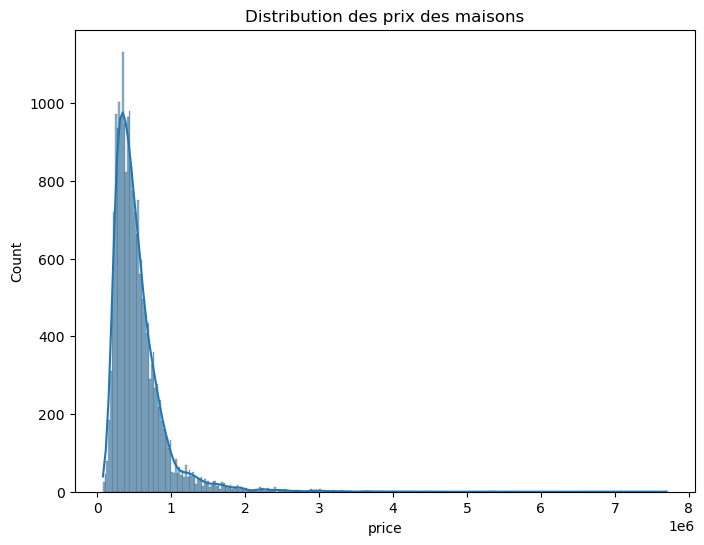

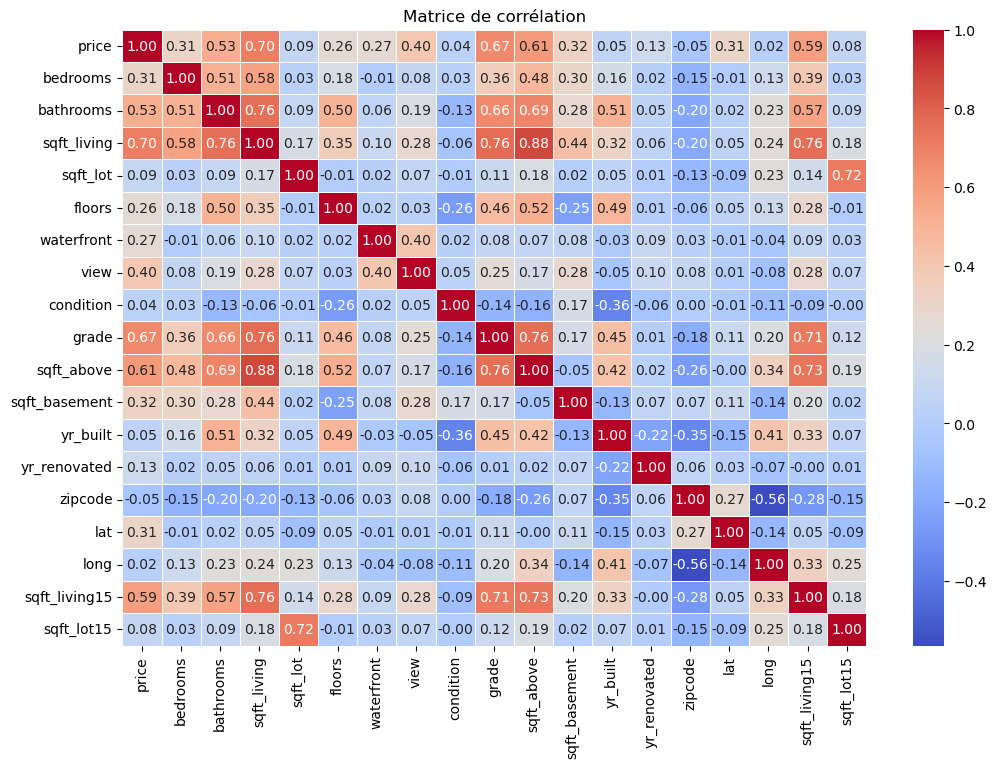

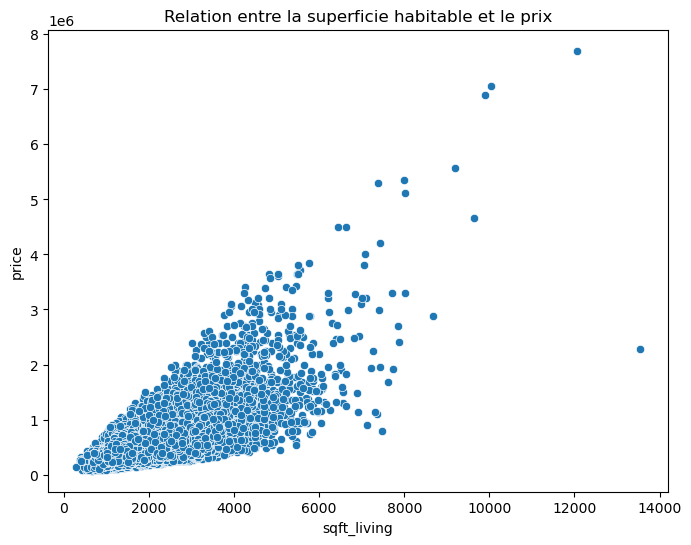

In [13]:
# Statistiques descriptives
print(df.describe())

# Visualisation de la distribution des prix (variable cible)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution des prix des maisons')
plt.show()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

# Visualisation de la relation entre la superficie habitable et le prix
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Relation entre la superficie habitable et le prix')
plt.show()


# 4. Préparation des Données

In [14]:
# Analyse des corrélations
correlation_matrix = df.corr()
correlations = correlation_matrix['price'].abs().sort_values(ascending=False)

# Sélection des 7 variables les plus corrélées avec le prix
top_features = correlations.index[1:8]
X = df[top_features]
y = df['price']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement
0,1180,7,1180,1340,1.00,0,0
1,2570,7,2170,1690,2.25,0,400
2,770,6,770,2720,1.00,0,0
3,1960,7,1050,1360,3.00,0,910
4,1680,8,1680,1800,2.00,0,0


# 5. Entraînement et Évaluation des Modèles

In [21]:
# Entraînement de tous les modèles disponibles
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred)
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\Koureissi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\Koureissi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.854e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


                                    MAE           MSE        R²
Linear Regression         159938.837435  6.362953e+10  0.579105
Ridge                     159938.990008  6.362979e+10  0.579103
Lasso                     159938.847451  6.362954e+10  0.579105
ElasticNet                160200.358845  6.390088e+10  0.577310
Random Forest             154003.060598  6.408902e+10  0.576066
Support Vector Regressor  228983.869487  1.603591e+11 -0.060740
K-Neighbors Regressor     173930.734305  7.534386e+10  0.501617


# 6. Sélection du Meilleur Modèle et Sauvegarde

In [22]:
# Sélection du meilleur modèle
best_model_name = results_df['R²'].idxmax()
best_model = models[best_model_name]

# Sauvegarde du modèle
joblib.dump(best_model, "model_final.joblib")

print(f"Le meilleur modèle est {best_model_name} avec un score R² de {results_df.loc[best_model_name, 'R²']}")


Le meilleur modèle est Linear Regression avec un score R² de 0.5791049209314925
